### Video Demo Notebook

In [4]:
import os
import insightface
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
import cv2
import os
from tqdm import tqdm
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
from tensorflow.keras.models import load_model
from PIL import Image
import skvideo.io
import glob

#### Load mask classifier model

In [2]:
model = load_model('../models/facemask_det_v1.h5')

#### Load retina face

In [3]:
import insightface

retinaface = insightface.model_zoo.get_model('retinaface_r50_v1')
retinaface.prepare(ctx_id = -1, nms=0.4);

[32, 16, 8] {'32': {'SCALES': (32, 16), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '16': {'SCALES': (8, 4), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '8': {'SCALES': (2, 1), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}}
use_landmarks True


## Loading Video Source

## Create FaceMaskNet Frames

In [ ]:
# Load Video Source
vidcap = cv2.VideoCapture('data/demo/zoom_take3.mp4')
os.system('rm -rf data/demo/frames_zoom_take3_continue/*.jpg')
num_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
image_list = []


for i in tqdm(range(num_frames)):
    success, img = vidcap.read()
    if not success:
        break
    bbox, landmark = retinaface.detect(img, threshold=0.7, scale=1)
    color_dict={0:(255,0,0), 1:(0,255,0), 2:(0,0,255)}
    labels_dict={0:'Mask worn incorrectly',1:'With Mask', 2:'No Mask'}

    for box in bbox:
        (x,y,w,h,z) = box.tolist()
        try:
            x,y,w,h = int(x),int(y),int(w),int(h) 
            face_img = img[y:h, x:w]
            resized=cv2.resize(face_img,(108,108))
            normalized=resized/255.0
            reshaped=np.reshape(normalized,(-1, 108,108,3))
            reshaped = np.vstack([reshaped])
            result=model.predict(reshaped)
            label=np.argmax(result,axis=1)[0]
            
            if label==2 or label==0:
                face_img = img[y-10:h+50, x:w+5]
                resized=cv2.resize(face_img,(108,108))
                normalized=resized/255.0
                reshaped=np.reshape(normalized,(-1, 108,108,3))
                reshaped = np.vstack([reshaped])
                result=model.predict(reshaped)
                label=np.argmax(result,axis=1)[0]
                cv2.rectangle(img,(x,y),(w,h+50),color_dict[label],2)
                cv2.rectangle(img,(x,y-40),(w,y),color_dict[label],-1)
                cv2.putText(img, labels_dict[label], (x, y-10),
                        cv2.FONT_HERSHEY_SIMPLEX,0.9,(255,255,255),2)
            else:
                cv2.rectangle(img,(x,y),(w,h),color_dict[label],2)
                cv2.rectangle(img,(x,y-40),(w,y),color_dict[label],-1)
                cv2.putText(img, labels_dict[label], (x, y-10),
                            cv2.FONT_HERSHEY_SIMPLEX,0.9,(255,255,255),2)
        except:
            continue
            
    cv2.imwrite(f"../data/demo/frames_zoom_take3_continue/{i:05}.jpg", img)

In [5]:
def predict(image, save=False):
    img = plt.imread(image)
    bbox, landmark = retinaface.detect(img, threshold=0.7, scale=1)
    color_dict={2:(255,0,0), 1:(0,255,0), 0:(0,0,255)}
    labels_dict={0:'Mask worn incorrectly',1:'With Mask', 2:'No Mask'}

    for box in bbox:
        (x,y,w,h,z) = box.tolist()
        try:
            x,y,w,h = int(x),int(y),int(w),int(h) 
            face_img = img[y:h, x:w]
            resized=cv2.resize(face_img,(108,108))
            normalized=resized/255.0
            reshaped=np.reshape(normalized,(-1, 108,108,3))
            reshaped = np.vstack([reshaped])
            result=model.predict(reshaped)
            label=np.argmax(result,axis=1)[0]
            
            if label==2 or label==0:
                face_img = img[y-10:h+50, x-5:w+5]
                resized=cv2.resize(face_img,(108,108))
                normalized=resized/255.0
                reshaped=np.reshape(normalized,(-1, 108,108,3))
                reshaped = np.vstack([reshaped])
                result=model.predict(reshaped)
                label=np.argmax(result,axis=1)[0]
                
                cv2.rectangle(img,(x,y),(w,h+50),color_dict[label],2)
                cv2.rectangle(img,(x,y-40),(w,y),color_dict[label],-1)
                cv2.putText(img, labels_dict[label], (x, y-10),
                        cv2.FONT_HERSHEY_SIMPLEX,0.9,(255,255,255),2)
                
                if label==0:
                    cv2.rectangle(img,(x,y),(w,h+50),color_dict[label],2)
                    cv2.rectangle(img,(x,y-40),(w,y),color_dict[label],-1)
                    cv2.putText(img, labels_dict[label], (x, y-10),
                            cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),2)
            else:
                cv2.rectangle(img,(x,y),(w,h),color_dict[label],2)
                cv2.rectangle(img,(x,y-40),(w,y),color_dict[label],-1)
                cv2.putText(img, labels_dict[label], (x, y-10),
                            cv2.FONT_HERSHEY_SIMPLEX,0.9,(255,255,255),2)
                
                
        except:
            continue
            
    if not save:
        fig = plt.figure(figsize=(1280/100, 720/100), dpi=100)
        plt.imshow(img)
        
    if save:
        name = os.path.basename(image)
        cv2.imwrite(f"../data/demo/zoom/{name}", img[:,:,::-1])

In [55]:
framesraw = sorted(glob.glob('../data/demo/zoom/*'))

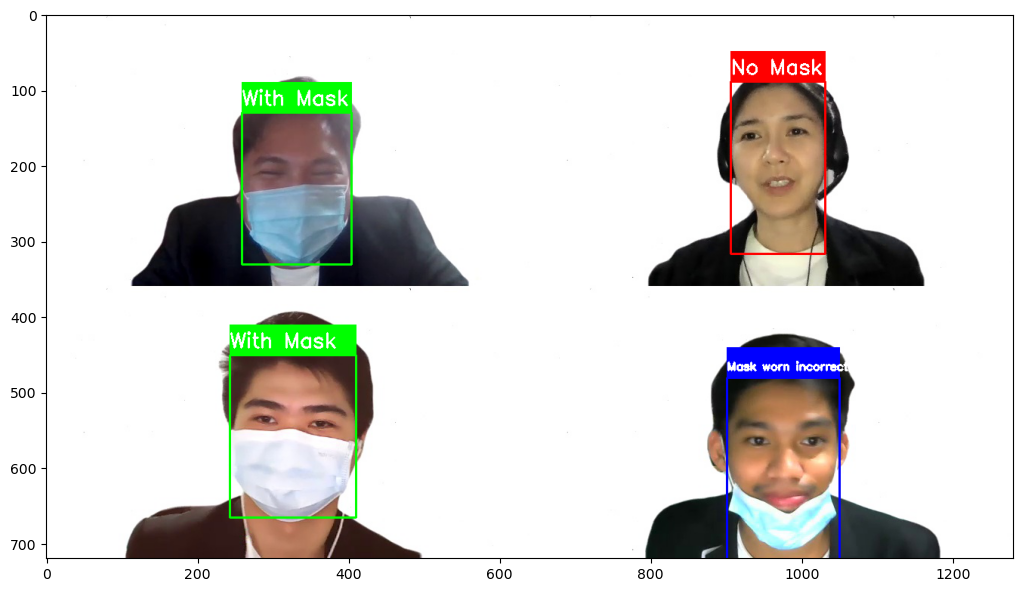

In [69]:
predict(framesraw[200])

In [22]:
for i in tqdm(framesraw):
    name = os.path.basename(i)
    img = cv2.imread(i)
    cv2.imwrite(f"../data/demo/zoom/{name}", img[:,:,::-1])

100%|██████████| 1160/1160 [02:27<00:00,  7.88it/s]


In [83]:
fps = 25

image_list = np.array([cv2.imread(i)[:,:,::-1] for i in framesraw])
skvideo.io.vwrite("data/demo_final.mp4",image_list, outputdict={'-r': str(fps)}, 
                  inputdict={'-r': str(fps)})

In [88]:
from moviepy.editor import *
videoclip = VideoFileClip("data/demo_final.mp4")
audioclip = AudioFileClip("data/zoom_take3.mp3")

new_audioclip = CompositeAudioClip([audioclip])
videoclip.audio = new_audioclip
videoclip.write_videofile("demo_final_audio.mp4")

Moviepy - Building video demo_final_audio.mp4.
MoviePy - Writing audio in demo_final_audioTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video demo_final_audio.mp4



Moviepy - Done !
Moviepy - video ready demo_final_audio.mp4


In [23]:
from IPython.display import Video

Video("../data/demo_final.mp4")